In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('data/특수진료병원목록.xls')
df1 = pd.read_excel('data/전국_응급의료.xls')
df2 = pd.read_excel('data/전국_중환자.xls')
df3 = pd.read_excel('data/전국_신생아중환자.xls')
df4 = pd.read_excel('data/전국_인공심박.xls')
df5 = pd.read_excel('data/전국_화상.xls')
df6 = pd.read_excel('data/전국_손발가락.xls')

In [3]:
mer = pd.concat([df1, df2, df3, df4, df5, df6], axis = 0)

In [4]:
frame = pd.DataFrame(df)
frame2 = pd.DataFrame(mer)

In [5]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_location = 'c:/\Windows/fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname = font_location).get_name()
matplotlib.rc('font', family = font_name)

In [6]:
from plotnine import *

In [7]:
frame.rename(columns = {'YPos' : '위도'}, inplace = True)
frame.rename(columns = {'XPos' : '경도'}, inplace = True)
frame.rename(columns = {'sidoCdNm' : '도시'}, inplace = True)

In [8]:
import folium

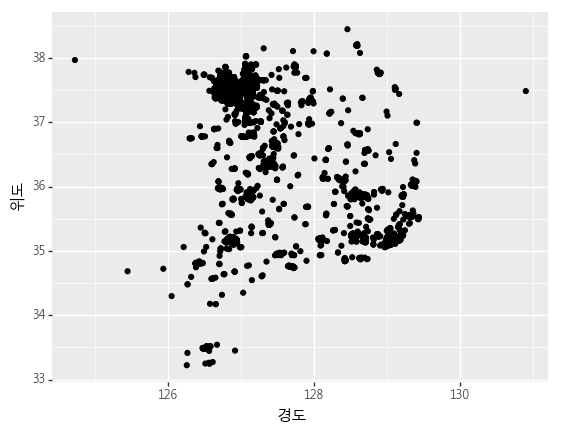

<ggplot: (14464103)>

In [9]:
(ggplot(frame)
+aes(x='경도', y='위도')
+geom_point()
+theme(text=element_text(family=font_name))
)

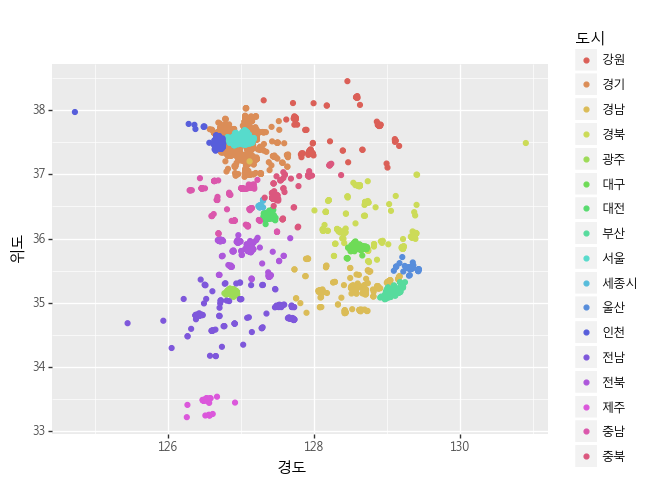

<ggplot: (15579493)>

In [10]:
(ggplot(frame)
+aes(x='경도', y='위도', color = '도시')
+geom_point()
+theme(text=element_text(family=font_name))
)

In [11]:
frame = frame.reset_index()

In [12]:
frame.rename(columns = {'yadmNm' : '의료시설'}, inplace = True)

In [13]:
map2 = folium.Map(location=[frame["위도"].mean(), frame["경도"].mean()], zoom_start=7)

for n in df4.index:
    folium.CircleMarker([frame["위도"][n], frame["경도"][n]], popup = frame["의료시설"][n], radius=3, color = 'blue').add_to(map2)
map2

In [14]:
map3 = folium.Map(location=[frame["위도"].mean(), frame["경도"].mean()], zoom_start=7)

for n in df5.index:
    folium.CircleMarker([frame["위도"][n], frame["경도"][n]], popup = frame["의료시설"][n], radius=3, color = 'red').add_to(map3)
map3

In [15]:
map4 = folium.Map(location=[frame["위도"].mean(), frame["경도"].mean()], zoom_start=7)

for n in df6.index:
    folium.CircleMarker([frame["위도"][n], frame["경도"][n]], popup = frame["의료시설"][n], radius=3, color = '#FF00DD').add_to(map4)
map4

In [16]:
map5 = folium.Map(location=[frame["위도"].mean(), frame["경도"].mean()], zoom_start=7)

for n in df2.index:
    folium.CircleMarker([frame["위도"][n], frame["경도"][n]], popup = frame["의료시설"][n], radius=3, color = '#476600').add_to(map5)
map5

In [17]:
map6 = folium.Map(location=[frame["위도"].mean(), frame["경도"].mean()], zoom_start=7)

for n in df3.index:
    folium.CircleMarker([frame["위도"][n], frame["경도"][n]], popup = frame["의료시설"][n], radius=3, color = '#670000').add_to(map6)
map6

In [18]:
frame.columns

Index(['index', 'addr', 'clCd', 'clCdNm', 'drTotCnt', 'estbDd', 'gdrCnt',
       'intnCnt', 'postNo', 'resdntCnt', 'sdrCnt', 'sgguCd', 'sgguCdNm',
       'sidoCd', '도시', 'telno', '경도', '위도', '의료시설', 'ykiho'],
      dtype='object')

In [19]:
frame.rename(columns = {'sdrCnt' : '전문의사수'}, inplace = True)

In [20]:
data = frame.drop_duplicates(subset = '의료시설', keep = 'last').set_index('의료시설')

In [21]:
gu = data.groupby('도시')['전문의사수'].sum()

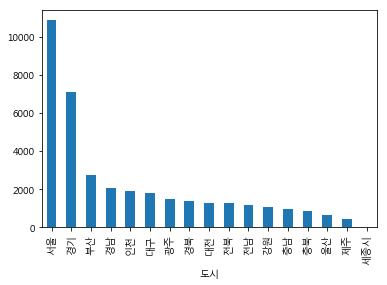

In [22]:
gu.sort_values(ascending=False).plot.bar() 

In [23]:
df = pd.read_csv('data/2013.csv',  encoding = 'euc-kr')
df1 = pd.read_csv('data/2014.csv',  encoding = 'euc-kr')
df2 = pd.read_csv('data/2015.csv',  encoding = 'euc-kr')
df3 = pd.read_csv('data/2016.csv',  encoding = 'euc-kr')
df4 = pd.read_csv('data/2017.csv', encoding = 'euc-kr')

In [24]:
con = pd.concat([df,df1,df2,df3,df4], sort = False)

In [25]:
view_columns = ['진료년도', '주상병코드', '입원외래구분', '환자수(명)'] 

In [26]:
con = con[view_columns]

In [27]:
con_burn = con[con['주상병코드'].str.contains('L55', case=False, na=False)]
con_cut = con[con['주상병코드'].str.contains('S68', case=False, na=False)]
con_baby1 = con[con['주상병코드'].str.contains('P22', case=False, na=False)]
con_baby2 = con[con['주상병코드'].str.contains('P57', case=False, na=False)]
con_baby3 = con[con['주상병코드'].str.contains('P58', case=False, na=False)]
con_baby4 = con[con['주상병코드'].str.contains('P29', case=False, na=False)]

In [28]:
con_baby = pd.concat([con_baby1,con_baby2,con_baby3,con_baby4], sort = False)

In [29]:
gu1 = con_burn.groupby('진료년도')['환자수(명)'].sum()
gu2 = con_cut.groupby('진료년도')['환자수(명)'].sum()
gu3 = con_baby.groupby('진료년도')['환자수(명)'].sum()

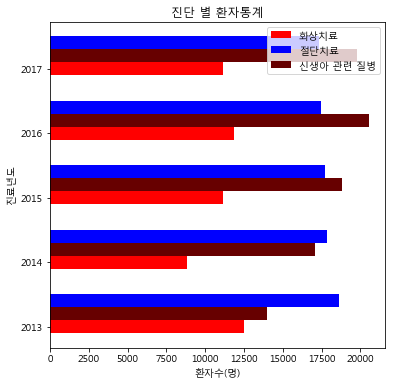

In [30]:
plt.rcParams["figure.figsize"] = (6,6)
plt.barh(gu1.index, gu1.values, height = 0.2, label = '화상치료', color = 'r')
plt.barh(gu2.index + 0.4, gu2.values, height = 0.2, label = '절단치료', color = 'b')
plt.barh(gu3.index + 0.2, gu3.values, height = 0.2,  label = '신생아 관련 질병', color = '#670000')
plt.xlabel('환자수(명)')
plt.ylabel('진료년도')
plt.legend(loc='best')
plt.title('진단 별 환자통계')
plt.show()